# User Analytics in the Telecommunication Industry

## Task 1: User Overview analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.precision',9)

In [3]:
df = pd.read_excel('Week2_challenge_data_source.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014481e+14,33664962239.0,3.552120951e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019092e+14,33681854413.0,3.579400901e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003145e+14,33760627129.0,3.528151036e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014023e+14,33750343200.0,3.535661016e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014014e+14,33699795932.0,3.540700975e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


### Top Ten handsets used by Customers

In [5]:
df.groupby('Handset Type')['MSISDN/Number'].count().nlargest(10)

Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: MSISDN/Number, dtype: int64

### Top Three handest Manufacturers

In [6]:
top3M = df.groupby('Handset Manufacturer')['Bearer Id'].count().nlargest(3)
top3M

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: Bearer Id, dtype: int64

### The top 5 handsets per handset manufacturer

In [7]:
def getFiveTop(toplist, df):
    topM = df.groupby('Handset Manufacturer')
    for key, value in toplist.items():
        print("Top Five devices for the Manufaturer " + key)
        print(topM.get_group(key).groupby('Handset Type')['Bearer Id'].count().nlargest(5))
        print("\n")

getFiveTop(top3M, df)

Top Five devices for the Manufaturer Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Bearer Id, dtype: int64


Top Five devices for the Manufaturer Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: Bearer Id, dtype: int64


Top Five devices for the Manufaturer Huawei
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: Bearer Id, dtype: int64




## Task 1.1 Aggregating column data

### Total Number of xDR sessions

In [8]:
df3 = df[df['Bearer Id'].notna()]
seTxdr = df3.groupby('Bearer Id')['Dur. (ms)'].count().sort_values(ascending=False)[1:]
dfTotalXdr = pd.DataFrame({'Bearer Id': seTxdr.index, 'Total Number of xDR sessions': seTxdr.values})
dfTotalXdr

,Bearer Id,Total Number of xDR sessions
0,13042425979269199872,16
1,13042425965944199168,10
2,13042425972278300672,9
3,13042425981873399808,9
4,13042425974582800384,9
...,...,...
134703,13042425960981700608,1
134704,13042425960981999616,1
134705,13042425960982099968,1
134706,13042425960982999040,1


### Total session duration in Microseconds

In [9]:
seDxdr = df3.groupby('Bearer Id')['Dur. (ms)'].agg('sum').sort_values(ascending=False)[1:]
dfDur = pd.DataFrame({'Bearer Id': seDxdr.index, 'Total Duration (ms)': seDxdr.values})
dfDur

,Bearer Id,Total Duration (ms)
0,13114483561758900224,5659733.0
1,13042425972205000704,4838428.0
2,13042425978965499904,3990246.0
3,13042425975793299456,3667444.0
4,13042425981873399808,2863468.0
...,...,...
134703,7277825656116110336,7284.0
134704,6917537685489510400,7267.0
134705,6917537673690099712,7258.0
134706,6917537669513839616,7146.0


### Total Download Data in Bytes

In [10]:
df2 = df
df2 = df2[df2['MSISDN/Number'].notna()]
df2['MSISDN/Number'] = df2['MSISDN/Number'].apply(np.int64)
seSDown = df2.groupby('MSISDN/Number')['Total DL (Bytes)'].agg('sum').sort_values(ascending=False)[1:]
dfDown = pd.DataFrame({'MSISDN/Number': seSDown.index, 'Total Download Data (Bytes)': seSDown.values})
dfDown


c:\users\gkkar\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,MSISDN/Number,Total Download Data (Bytes)
0,33760536639,7811295382.0
1,33625779332,7770043342.0
2,33675877202,7309541816.0
3,33626320676,7301516540.0
4,33659725664,7081602462.0
...,...,...
106850,33666684512,9455608.0
106851,33760578459,9275626.0
106852,33658797043,9199518.0
106853,33659200818,9046209.0


### Total Upload data in Bytes 

In [11]:
seSUp = df2.groupby('MSISDN/Number')['Total UL (Bytes)'].agg('sum').sort_values(ascending=False)[1:]
dfUp = pd.DataFrame({'MSISDN/Number': seSUp.index, 'Total Uploaded Data (Bytes)': seSUp.values})
dfUp

,MSISDN/Number,Total Uploaded Data (Bytes)
0,33760536639,703478581.0
1,33614892860,689483001.0
2,33626320676,669650721.0
3,33659725664,624260321.0
4,33675877202,581568792.0
...,...,...
106850,33661893084,5921981.0
106851,33669429697,5461287.0
106852,33659052775,5276726.0
106853,33664682771,4338786.0


### Total Data volume for the  for each application

In [12]:
dfApps = df2.loc[:, 'Social Media DL (Bytes)': 'Other UL (Bytes)']
dfApps.apply(lambda x : x.fillna(x.mean()), axis=0)

apps = ["Social Media", "Google", "Email", "Youtube", "Netflix", "Gaming", "Other"]

for item in apps:
    down = item + " DL (Bytes)"
    up = item + " UL (Bytes)"
    total = "Total Data " + item
    dfApps[total] = dfApps[down] + dfApps[up]

dfAppsTotal = dfApps.loc[:, 'Total Data Social Media': 'Total Data Other']
dfAppsTotal['MSISDN/Number'] = df2["MSISDN/Number"]

def aggTotalDataEach(dataf, col):
    s = dataf.groupby('MSISDN/Number')[col].agg('sum').sort_values(ascending=False)[1:]
    df = pd.DataFrame({'MSISDN/Number': s.index, col: s.values})
    return df

dfSm = aggTotalDataEach(dfAppsTotal, 'Total Data Social Media')
dfGo = aggTotalDataEach(dfAppsTotal, 'Total Data Google')
dfEm = aggTotalDataEach(dfAppsTotal, 'Total Data Email')
dfYo = aggTotalDataEach(dfAppsTotal, 'Total Data Youtube')
dfNe = aggTotalDataEach(dfAppsTotal, 'Total Data Netflix')
dfGa = aggTotalDataEach(dfAppsTotal, 'Total Data Gaming')
dfOt = aggTotalDataEach(dfAppsTotal, 'Total Data Other')

In [13]:
dfSm

,MSISDN/Number,Total Data Social Media
0,33760536639,39783189.0
1,33659725664,35412358.0
2,33614892860,28294544.0
3,33625779332,27135500.0
4,33667163239,24247850.0
...,...,...
106850,33762201799,7503.0
106851,33760490061,7382.0
106852,33668248171,4469.0
106853,33659843938,2003.0


In [14]:
dfGo

,MSISDN/Number,Total Data Google
0,33625779332,142307915.0
1,33614892860,127973787.0
2,33760536639,123223099.0
3,33659725664,116516345.0
4,33786323068,110254484.0
...,...,...
106850,33761321476,112674.0
106851,33669526270,112590.0
106852,33674088978,99826.0
106853,33698001031,89856.0


In [15]:
dfEm

,MSISDN/Number,Total Data Email
0,33614892860,40788634.0
1,33625779332,40633966.0
2,33786323068,36310123.0
3,33659725664,35999792.0
4,33760536639,33693767.0
...,...,...
106850,33664898641,29451.0
106851,33675896712,27503.0
106852,33644791426,26116.0
106853,33652039542,26087.0


In [16]:
dfYo

,MSISDN/Number,Total Data Youtube
0,33760536639,396289198.0
1,33614892860,394370218.0
2,33626320676,374483047.0
3,33675877202,317410572.0
4,33667163239,315231310.0
...,...,...
106850,33699704781,239357.0
106851,33768483944,226562.0
106852,33648091896,207955.0
106853,33669488505,157446.0


In [17]:
dfNe

,MSISDN/Number,Total Data Netflix
0,33614892860,361401046.0
1,33625779332,356980607.0
2,33760536639,334643269.0
3,33626320676,328725740.0
4,33760413819,318347546.0
...,...,...
106850,33698486515,284133.0
106851,33698533842,260252.0
106852,33667489726,248628.0
106853,33615884686,201564.0


In [18]:
dfGa

,MSISDN/Number,Total Data Gaming
0,33760536639,7461045228.0
1,33625779332,7326673487.0
2,33675877202,6970567597.0
3,33626320676,6887572116.0
4,33659725664,6725559211.0
...,...,...
106850,33698056654,1180903.0
106851,33698080559,939116.0
106852,33769596346,690038.0
106853,33682310624,595375.0


In [19]:
dfOt

,MSISDN/Number,Total Data Other
0,33614892860,7639263572.0
1,33675877202,6798515150.0
2,33625779332,6354583086.0
3,33603127838,6326670874.0
4,33659725664,6317415487.0
...,...,...
106850,33663539547,1130046.0
106851,33626033383,1127863.0
106852,33761590308,972727.0
106853,33633594222,511769.0


# Interim Submission

## univariate analysis

### Total Number of xDR sessions

In [20]:
dfTotalXdr.describe()

,Total Number of xDR sessions
count,134708.000000000
mean,1.106170383
std,0.385198611
min,1.000000000
25%,1.000000000
50%,1.000000000
75%,1.000000000
max,16.000000000


###  	Total Duration (ms)

In [21]:
dfDur.describe()

,Total Duration (ms)
count,1.347080000e+05
mean,1.161104899e+05
std,9.982828103e+04
min,7.142000000e+03
25%,6.008050000e+04
50%,8.640000000e+04
75%,1.530890000e+05
max,5.659733000e+06


### Total Download Data (Bytes)

In [22]:
dfDown["Total Download Data (Bytes)"].describe()

count    1.068550000e+05
mean     6.335822762e+08
std      4.639867989e+08
min      8.827082000e+06
25%      3.148239395e+08
50%      5.703641900e+08
75%      8.073558785e+08
max      7.811295382e+09
Name: Total Download Data (Bytes), dtype: float64

### Total Uploaded Data (Bytes)

In [23]:
dfUp["Total Uploaded Data (Bytes)"].describe()

count    1.068550000e+05
mean     5.730313101e+07
std      3.559845918e+07
min      2.866892000e+06
25%      3.639541250e+07
50%      4.679338600e+07
75%      6.573039900e+07
max      7.034785810e+08
Name: Total Uploaded Data (Bytes), dtype: float64

### Total Data Social Media

In [24]:
dfSm["Total Data Social Media"].describe()

count    1.068550000e+05
mean     2.547584739e+06
std      1.903954824e+06
min      1.563000000e+03
25%      1.211254000e+06
50%      2.303701000e+06
75%      3.307496500e+06
max      3.978318900e+07
Name: Total Data Social Media, dtype: float64

### Total Data Google

In [25]:
dfGo['Total Data Google'].describe()

count    1.068550000e+05
mean     1.088111198e+07
std      7.532502240e+06
min      4.033000000e+04
25%      5.942589000e+06
50%      9.586120000e+06
75%      1.321461200e+07
max      1.423079150e+08
Name: Total Data Google, dtype: float64

### Total Data Email

In [26]:
dfEm['Total Data Email'].describe()

count    1.068550000e+05
mean     3.148428304e+06
std      2.219161137e+06
min      1.817600000e+04
25%      1.674478000e+06
50%      2.799795000e+06
75%      3.847164500e+06
max      4.078863400e+07
Name: Total Data Email, dtype: float64

### Total Data Youtube

In [27]:
dfYo['Total Data Youtube'].describe()

count    1.068550000e+05
mean     3.155445561e+07
std      2.125596081e+07
min      7.890300000e+04
25%      1.863072800e+07
50%      2.680034900e+07
75%      3.792762300e+07
max      3.962891980e+08
Name: Total Data Youtube, dtype: float64

### Total Data Netflix

In [28]:
dfNe['Total Data Netflix'].describe()

count    1.068550000e+05
mean     3.153488857e+07
std      2.125987357e+07
min      1.845690000e+05
25%      1.855587850e+07
50%      2.671823100e+07
75%      3.797681300e+07
max      3.614010460e+08
Name: Total Data Netflix, dtype: float64

### Total Data Gaming

In [29]:
dfGa['Total Data Gaming'].describe()

count    1.068550000e+05
mean     5.997021008e+08
std      4.486196978e+08
min      3.063580000e+05
25%      2.880595860e+08
50%      5.423483010e+08
75%      7.772885805e+08
max      7.461045228e+09
Name: Total Data Gaming, dtype: float64

### Total Data Other

# Graphical Univariate Analysis

### Total Number of xDR sessions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000165D3C024A8>]],
      dtype=object)

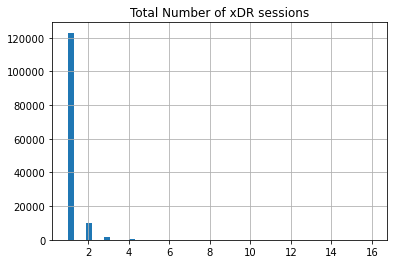

In [30]:
dfTotalXdr.hist(bins=50)

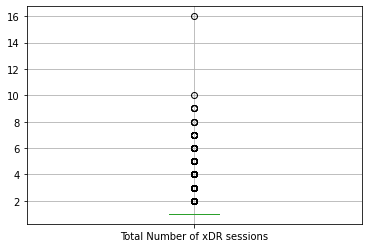

In [31]:
dfTotalXdr.boxplot()

###  	Total Duration (ms)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000165D13A67F0>]],
      dtype=object)

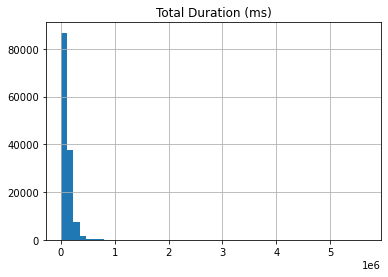

In [32]:
dfDur.hist(bins=50)

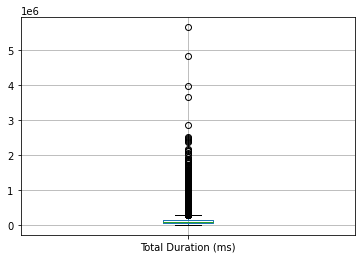

In [33]:
dfDur.boxplot()

### Total Download Data (Bytes)

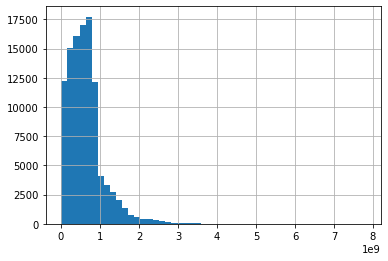

In [34]:
dfDown["Total Download Data (Bytes)"].hist(bins=50)

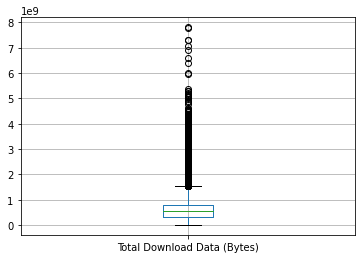

In [35]:
dfDown.boxplot(column = 'Total Download Data (Bytes)')

### Total Uploaded Data (Bytes)

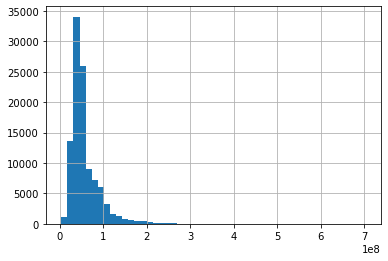

In [36]:
dfUp["Total Uploaded Data (Bytes)"].hist(bins=50)

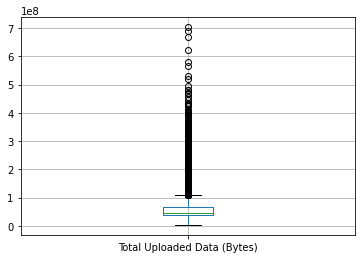

In [37]:
dfUp.boxplot(column="Total Uploaded Data (Bytes)")

### Total Data Social Media

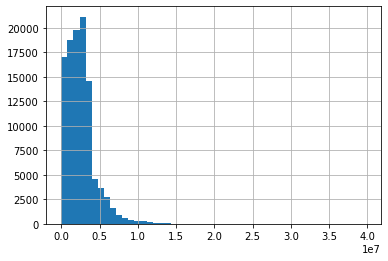

In [38]:
dfSm["Total Data Social Media"].hist(bins=50)

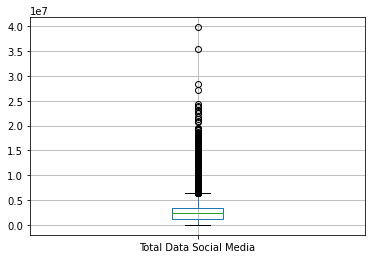

In [39]:
dfSm.boxplot(column="Total Data Social Media")

### Total Data Google

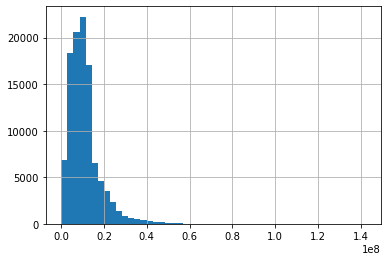

In [40]:
dfGo['Total Data Google'].hist(bins=50)

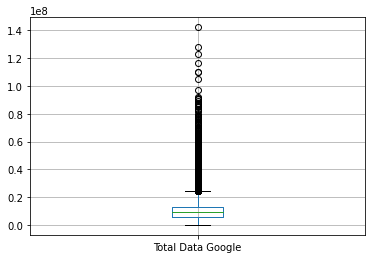

In [41]:
dfGo.boxplot(column='Total Data Google')

### Total Data Email

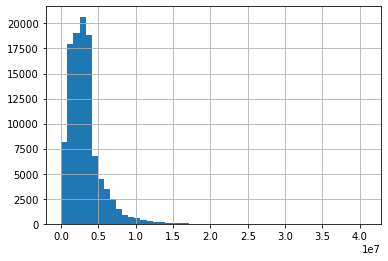

In [42]:
dfEm['Total Data Email'].hist(bins=50)

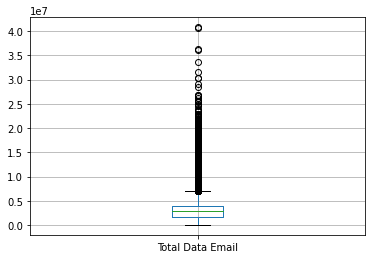

In [43]:
dfEm.boxplot(column='Total Data Email')

### Total Data Youtube

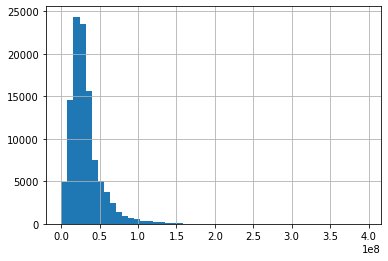

In [44]:
dfYo['Total Data Youtube'].hist(bins=50)

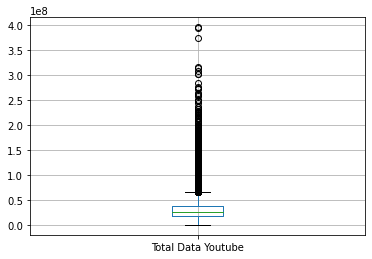

In [45]:
dfYo.boxplot(column='Total Data Youtube')

### Total Data Netflix

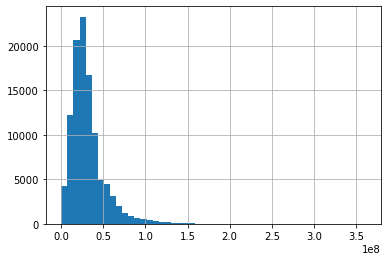

In [46]:
dfNe['Total Data Netflix'].hist(bins=50)

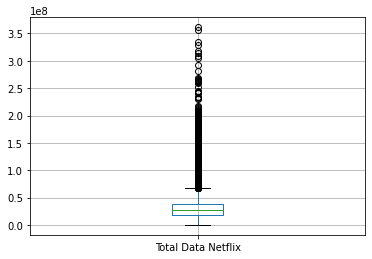

In [47]:
dfNe.boxplot(column='Total Data Netflix')

### Total Data Gaming

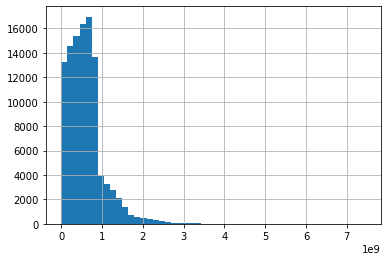

In [48]:
dfGa['Total Data Gaming'].hist(bins=50)

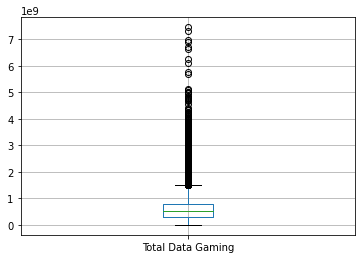

In [49]:
dfGa.boxplot(column='Total Data Gaming')

### Total Data Other

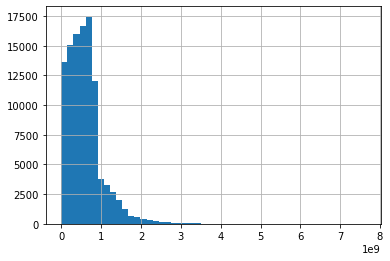

In [50]:
dfOt['Total Data Other'].hist(bins=50)

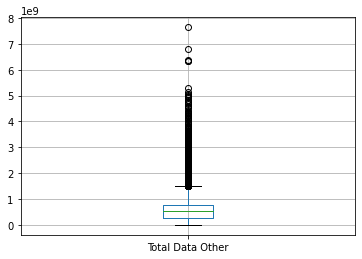

In [51]:
dfOt.boxplot(column='Total Data Other')

# Bivariate plot

In [52]:
dfBplot = pd.merge(dfSm, dfGo, on='MSISDN/Number')
dfBplot = pd.merge(dfBplot, dfEm, on='MSISDN/Number')
dfBplot = pd.merge(dfBplot, dfNe, on='MSISDN/Number')
dfBplot = pd.merge(dfBplot, dfYo, on='MSISDN/Number')
dfBplot = pd.merge(dfBplot, dfGa, on='MSISDN/Number')
dfBplot = pd.merge(dfBplot, dfOt, on='MSISDN/Number')
dfBplot

,MSISDN/Number,Total Data Social Media,Total Data Google,Total Data Email,Total Data Netflix,Total Data Youtube,Total Data Gaming,Total Data Other
0,33760536639,39783189.0,123223099.0,33693767.0,334643269.0,396289198.0,7461045228.0,4716134493.0
1,33667163239,24247850.0,105032696.0,30335796.0,313939488.0,315231310.0,4725621924.0,4941518794.0
2,33786323068,23974919.0,110254484.0,36310123.0,305939790.0,214763912.0,4851095633.0,4252487035.0
3,33669068942,23800834.0,77824684.0,22923413.0,212009030.0,236402804.0,3269151651.0,4605369289.0
4,33603127838,23077825.0,86929016.0,26198895.0,260488421.0,284090139.0,4191444592.0,6326670874.0
...,...,...,...,...,...,...,...,...
106847,33762201799,7503.0,4091830.0,2032572.0,31895329.0,15495449.0,668216323.0,567301952.0
106848,33760490061,7382.0,7488358.0,1601901.0,17084479.0,28145979.0,98463113.0,803849336.0
106849,33668248171,4469.0,11311821.0,1637343.0,16569197.0,12137801.0,525103350.0,247972465.0
106850,33659843938,2003.0,3506002.0,2909057.0,10644620.0,17149398.0,318464560.0,433293571.0
